## Final Project Submission

Please fill out:
* Student name: Hiten Patel  
* Student pace: Full Time Online Data Science
* Scheduled project review date/time: Aug, 7th; 1;30pm
* Instructor name: James Irving 
* Blog post URL:https://hpatel530.github.io/


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## **Introduction**
Microsoft has decided to create a new movie studio and they are looking for a team to help them better understand the movie industry. The team will be in charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office.

The database that was chosen was the IMDB's Top 250 Films. The ratings are calculated by using a combination of fans and critics. The decision was based on using a database that only consisted of highly rated films and not a database that consist of every film in the market, which could produce outliers and misleading numbers. 

I took on 'what the fans love' approach and did not pay much attention to the box office numbers.

For example look at the data for the following movies; 

Alice in Wonderland (2010) IMDB Rating: 6.4/10 World-wide Gross: 1  Billion 

Transformers: Age of Extinction (2014) IMDB Rating: 5.6/10 
World-wide Gross: 1.1 Billion

The Godfather (1972) IMDB Rating: 9.2/10 
World-wide Gross: 246 Million

The Shawshank Redemption (1994)	IMDB Rating: 9.3/10	
World-wide Gross: Less than 29 million

Movies that made a splash at the box office had low user/fan ratings. On the contrary, movies with high ratings didn't do so well at the box-office. Actually, they stunk.

Why is that? Better marketing? More movie-watchers this generation? How would a film like The Godfather or The Shawshank Redemption do in this generation? We may never know. But, what we do know, is the fans love these types of films and I will present to you why. 

## WEB Scraping IMDB TOP 250 

**Using the get() method to retrieve a website**

**Using the status_code method to double check success**

In [2]:
import requests
url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating'
response = requests.get(url)
response.status_code

200

**Importing BeautifulSoup and running the website through that package**

In [3]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(response.content, 'html.parser')

**Extracting the Movie Title from Page 1**

In [4]:
title_content = soup.find('div', class_='lister-list')
list_of_h3= title_content.find_all('h3')

final_title = []
for h3 in list_of_h3: 
    text = h3.text.replace('\n', '').split('.')[1]
    text = text[:-6]
    final_title.append(text) 
print (final_title)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather: Part II', 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', "Schindler's List", '12 Angry Men', 'Hamilton', 'Inception', 'Fight Club', 'The Lord of the Rings: The Fellowship of the Ring', 'Forrest Gump', 'The Good, the Bad and the Ugly', 'The Lord of the Rings: The Two Towers', 'The Matrix', 'Goodfellas', 'Star Wars: Episode V - The Empire Strikes Back', "One Flew Over the Cuckoo's Nest", 'Harakiri', 'Parasite', 'Interstellar', 'City of God', 'Spirited Away', 'Saving Private Ryan', 'The Green Mile', 'Life Is Beautiful', 'Se7en', 'The Silence of the Lambs', 'Star Wars: Episode IV - A New Hope', 'Seven Samurai', "It's a Wonderful Life", 'Joker', 'Whiplash', 'The Intouchables', 'The Prestige', 'The Departed', 'The Pianist', 'Gladiator', 'American History X', 'The Usual Suspects', 'Léon: The Professional', 'The Lion King', 'Terminator 2: Judgment Day', 'Cinema Paradiso', 'Grave of the Fireflies'

**Retrieve Movie Title Function**

In [5]:
def retrieve_movietitle(soup):
    """Retrieving movie titles from soup"""
    title_content = soup.find('div', class_='lister-list')
    list_of_h3= title_content.find_all('h3')
    
    final_title = []
    for h3 in list_of_h3: 
        text = h3.text.replace('\n', '').split('.')[1]
        text = text[:-6]
        final_title.append(text)
    
    return final_title

In [6]:
#testing the function 
retrieve_movietitle(soup)

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather: Part II',
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 "Schindler's List",
 '12 Angry Men',
 'Hamilton',
 'Inception',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Forrest Gump',
 'The Good, the Bad and the Ugly',
 'The Lord of the Rings: The Two Towers',
 'The Matrix',
 'Goodfellas',
 'Star Wars: Episode V - The Empire Strikes Back',
 "One Flew Over the Cuckoo's Nest",
 'Harakiri',
 'Parasite',
 'Interstellar',
 'City of God',
 'Spirited Away',
 'Saving Private Ryan',
 'The Green Mile',
 'Life Is Beautiful',
 'Se7en',
 'The Silence of the Lambs',
 'Star Wars: Episode IV - A New Hope',
 'Seven Samurai',
 "It's a Wonderful Life",
 'Joker',
 'Whiplash',
 'The Intouchables',
 'The Prestige',
 'The Departed',
 'The Pianist',
 'Gladiator',
 'American History X',
 'The Usual Suspects',
 'Léon: The Professional',
 'The Lion King',
 'Terminator 2: Judgment Day',


**Extracting the Release Year**

In [7]:
title_content = soup.find('div', class_='lister-list')
list_of_h3= title_content.find_all('h3')
#list_of_h3[0].text.replace('\n', '')[-5:-1]

release_year = []
for h3 in list_of_h3:
    text = h3.text[-6:-2]
    release_year.append(text)
print(release_year)

['1994', '1972', '2008', '1974', '2003', '1994', '1993', '1957', '2020', '2010', '1999', '2001', '1994', '1966', '2002', '1999', '1990', '1980', '1975', '1962', '2019', '2014', '2002', '2001', '1998', '1999', '1997', '1995', '1991', '1977', '1954', '1946', '2019', '2014', '2011', '2006', '2006', '2002', '2000', '1998', '1995', '1994', '1994', '1991', '1988', '1988', '1985', '1971', '1968', '1960']


**Retrieve Release Year Function**

In [8]:
def retrieve_year(soup): 
    """Retrieving the release year of the movie from soup"""
    title_content = soup.find('div', class_='lister-list')
    list_of_h3= title_content.find_all('h3')
    
    release_year = []
    for h3 in list_of_h3:
        text = h3.text[-6:-2]
        release_year.append(text)
    return release_year

In [9]:
#testing the function 
retrieve_year(soup)

['1994',
 '1972',
 '2008',
 '1974',
 '2003',
 '1994',
 '1993',
 '1957',
 '2020',
 '2010',
 '1999',
 '2001',
 '1994',
 '1966',
 '2002',
 '1999',
 '1990',
 '1980',
 '1975',
 '1962',
 '2019',
 '2014',
 '2002',
 '2001',
 '1998',
 '1999',
 '1997',
 '1995',
 '1991',
 '1977',
 '1954',
 '1946',
 '2019',
 '2014',
 '2011',
 '2006',
 '2006',
 '2002',
 '2000',
 '1998',
 '1995',
 '1994',
 '1994',
 '1991',
 '1988',
 '1988',
 '1985',
 '1971',
 '1968',
 '1960']

**Extracting the Movie Genre**

In [10]:
title_content = soup.find('div', class_='lister-list')
genre = title_content.find_all('span', class_= 'genre')
#genre[0].text.strip()

final_genre = []
for g in genre:
    words = g.text.strip()
    final_genre.append(words)
print(len(final_genre), final_genre)

50 ['Drama', 'Crime, Drama', 'Action, Crime, Drama', 'Crime, Drama', 'Action, Adventure, Drama', 'Crime, Drama', 'Biography, Drama, History', 'Crime, Drama', 'Biography, Drama, History', 'Action, Adventure, Sci-Fi', 'Drama', 'Action, Adventure, Drama', 'Drama, Romance', 'Western', 'Action, Adventure, Drama', 'Action, Sci-Fi', 'Biography, Crime, Drama', 'Action, Adventure, Fantasy', 'Drama', 'Action, Drama, Mystery', 'Comedy, Drama, Thriller', 'Adventure, Drama, Sci-Fi', 'Crime, Drama', 'Animation, Adventure, Family', 'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance', 'Crime, Drama, Mystery', 'Crime, Drama, Thriller', 'Action, Adventure, Fantasy', 'Action, Adventure, Drama', 'Drama, Family, Fantasy', 'Crime, Drama, Thriller', 'Drama, Music', 'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi', 'Crime, Drama, Thriller', 'Biography, Drama, Music', 'Action, Adventure, Drama', 'Drama', 'Crime, Mystery, Thriller', 'Action, Crime, Drama', 'Animation, Adventure, Drama', 'Action,

**Retrieve Genre Function**


In [11]:
def retrieve_genre(soup):
    """Retrieving the genre of the movie from soup"""
    title_content = soup.find('div', class_='lister-list')
    genre = title_content.find_all('span', class_= 'genre')

    final_genre = []
    for g in genre:
        words = g.text.strip()
        final_genre.append(words)
    return final_genre

In [12]:
#testing the function 
retrieve_genre(soup)

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Crime, Drama',
 'Action, Adventure, Drama',
 'Crime, Drama',
 'Biography, Drama, History',
 'Crime, Drama',
 'Biography, Drama, History',
 'Action, Adventure, Sci-Fi',
 'Drama',
 'Action, Adventure, Drama',
 'Drama, Romance',
 'Western',
 'Action, Adventure, Drama',
 'Action, Sci-Fi',
 'Biography, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Drama',
 'Action, Drama, Mystery',
 'Comedy, Drama, Thriller',
 'Adventure, Drama, Sci-Fi',
 'Crime, Drama',
 'Animation, Adventure, Family',
 'Drama, War',
 'Crime, Drama, Fantasy',
 'Comedy, Drama, Romance',
 'Crime, Drama, Mystery',
 'Crime, Drama, Thriller',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Drama',
 'Drama, Family, Fantasy',
 'Crime, Drama, Thriller',
 'Drama, Music',
 'Biography, Comedy, Drama',
 'Drama, Mystery, Sci-Fi',
 'Crime, Drama, Thriller',
 'Biography, Drama, Music',
 'Action, Adventure, Drama',
 'Drama',
 'Crime, Mystery, Thriller',
 'Action, Crime, Drama',
 

**Extracting the Movie Certification(ex: R, PG-13)**

In [13]:
title_content = soup.find('div', class_='lister-list')
rating = title_content.find_all('span', class_= 'certificate')

certification = []
for p in rating:
    new_rating = p.text
    certification.append(new_rating)
    
print (len(certification), certification)

50 ['R', 'R', 'PG-13', 'R', 'PG-13', 'R', 'R', 'Approved', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG', 'R', 'Not Rated', 'R', 'PG-13', 'R', 'PG', 'R', 'R', 'PG-13', 'R', 'R', 'PG', 'Not Rated', 'PG', 'R', 'R', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'Not Rated', 'PG', 'Not Rated', 'PG-13', 'R']


**Retrieve Movie Certification Function**


In [14]:
def retrieve_cert(soup):
    """Retrieving the certification of the movie from soup"""
    title_content = soup.find('div', class_='lister-list')
    rating = title_content.find_all('span', class_= 'certificate')
    
    certification = []
    for p in rating:
        new_rating = p.text
        certification.append(new_rating)
    
    return certification

In [15]:
#testing the function 
retrieve_cert(soup)

['R',
 'R',
 'PG-13',
 'R',
 'PG-13',
 'R',
 'R',
 'Approved',
 'PG-13',
 'PG-13',
 'R',
 'PG-13',
 'PG-13',
 'R',
 'PG-13',
 'R',
 'R',
 'PG',
 'R',
 'Not Rated',
 'R',
 'PG-13',
 'R',
 'PG',
 'R',
 'R',
 'PG-13',
 'R',
 'R',
 'PG',
 'Not Rated',
 'PG',
 'R',
 'R',
 'R',
 'PG-13',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'G',
 'R',
 'R',
 'Not Rated',
 'PG',
 'Not Rated',
 'PG-13',
 'R']

**Extracting the Movie IMDB Rating**

In [16]:
title_content = soup.find('div', class_='lister-list')
imdb = title_content.find_all('div', class_='inline-block ratings-imdb-rating')
#imdb[0].text.replace('\n', "")

imdb_rating = []
for rate in imdb:
    rating = rate.text.strip()
    imdb_rating.append(rating)
print (len(imdb_rating), imdb_rating)

50 ['9.3', '9.2', '9.0', '9.0', '8.9', '8.9', '8.9', '8.9', '8.8', '8.8', '8.8', '8.8', '8.8', '8.8', '8.7', '8.7', '8.7', '8.7', '8.7', '8.7', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5']


**Retrieve Movie IMDB Rating Function**


In [17]:
def retrieve_imdb(soup):
    """Retrieving the movie imdb rating from soup"""
    title_content = soup.find('div', class_='lister-list')
    imdb = title_content.find_all('div', class_='inline-block ratings-imdb-rating')
    
    imdb_rating = []
    for rate in imdb:
        rating = rate.text.strip()
        imdb_rating.append(rating)
    return imdb_rating

In [18]:
#testing the function 
retrieve_imdb(soup)

['9.3',
 '9.2',
 '9.0',
 '9.0',
 '8.9',
 '8.9',
 '8.9',
 '8.9',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5']

**Extracting the Director**

In [19]:
title_content = soup.find('div', class_='lister-list')
director = title_content.find_all('p', class_="")
#director[0].find('a').text

final_directors = []
for person in director:
    final = person.find('a').text
    final_directors.append(final)
print(final_directors)

['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan', 'Francis Ford Coppola', 'Peter Jackson', 'Quentin Tarantino', 'Steven Spielberg', 'Sidney Lumet', 'Thomas Kail', 'Christopher Nolan', 'David Fincher', 'Peter Jackson', 'Robert Zemeckis', 'Sergio Leone', 'Peter Jackson', 'Lana Wachowski', 'Martin Scorsese', 'Irvin Kershner', 'Milos Forman', 'Masaki Kobayashi', 'Bong Joon Ho', 'Christopher Nolan', 'Fernando Meirelles', 'Hayao Miyazaki', 'Steven Spielberg', 'Frank Darabont', 'Roberto Benigni', 'David Fincher', 'Jonathan Demme', 'George Lucas', 'Akira Kurosawa', 'Frank Capra', 'Todd Phillips', 'Damien Chazelle', 'Olivier Nakache', 'Christopher Nolan', 'Martin Scorsese', 'Roman Polanski', 'Ridley Scott', 'Tony Kaye', 'Bryan Singer', 'Luc Besson', 'Roger Allers', 'James Cameron', 'Giuseppe Tornatore', 'Isao Takahata', 'Robert Zemeckis', 'Hrishikesh Mukherjee', 'Sergio Leone', 'Alfred Hitchcock']


**Retrieve Movie Director Function**

In [20]:
def retrieve_director(soup):
    '''Retrieving movie director from soup'''
    title_content = soup.find('div', class_='lister-list')
    director = title_content.find_all('p', class_="")

    final_directors = []
    for person in director:
        final = person.find('a').text
        final_directors.append(final)
    return final_directors

In [21]:
#testing the function 
retrieve_director(soup)

['Frank Darabont',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Francis Ford Coppola',
 'Peter Jackson',
 'Quentin Tarantino',
 'Steven Spielberg',
 'Sidney Lumet',
 'Thomas Kail',
 'Christopher Nolan',
 'David Fincher',
 'Peter Jackson',
 'Robert Zemeckis',
 'Sergio Leone',
 'Peter Jackson',
 'Lana Wachowski',
 'Martin Scorsese',
 'Irvin Kershner',
 'Milos Forman',
 'Masaki Kobayashi',
 'Bong Joon Ho',
 'Christopher Nolan',
 'Fernando Meirelles',
 'Hayao Miyazaki',
 'Steven Spielberg',
 'Frank Darabont',
 'Roberto Benigni',
 'David Fincher',
 'Jonathan Demme',
 'George Lucas',
 'Akira Kurosawa',
 'Frank Capra',
 'Todd Phillips',
 'Damien Chazelle',
 'Olivier Nakache',
 'Christopher Nolan',
 'Martin Scorsese',
 'Roman Polanski',
 'Ridley Scott',
 'Tony Kaye',
 'Bryan Singer',
 'Luc Besson',
 'Roger Allers',
 'James Cameron',
 'Giuseppe Tornatore',
 'Isao Takahata',
 'Robert Zemeckis',
 'Hrishikesh Mukherjee',
 'Sergio Leone',
 'Alfred Hitchcock']

**Extracting the Domestic Gross in Millions**

In [22]:
title_content = soup.find('div', class_='lister-list')
gross = title_content.find_all('p', class_='sort-num_votes-visible')

final_gross = []
for money in gross: 
    final = money.find_all('span')
    final = final[-1].text
    final_gross.append(final)
print(final_gross)

['$28.34M', '$134.97M', '$534.86M', '$57.30M', '$377.85M', '$107.93M', '$96.90M', '$4.36M', '32,728', '$292.58M', '$37.03M', '$315.54M', '$330.25M', '$6.10M', '$342.55M', '$171.48M', '$46.84M', '$290.48M', '$112.00M', '36,628', '$53.37M', '$188.02M', '$7.56M', '$10.06M', '$216.54M', '$136.80M', '$57.60M', '$100.13M', '$130.74M', '$322.74M', '$0.27M', '387,088', '$335.45M', '$13.09M', '$13.18M', '$53.09M', '$132.38M', '$32.57M', '$187.71M', '$6.72M', '$23.34M', '$19.50M', '$422.78M', '$204.84M', '$11.99M', '223,985', '$210.61M', '27,723', '$5.32M', '$32.00M']


**Retrieve Domestic Gross Function**

In [23]:

def retrieve_domestic(soup):
    """Retriving domestic gross from soup"""
    title_content = soup.find('div', class_='lister-list')
    gross = title_content.find_all('p', class_='sort-num_votes-visible')

    final_gross = []
    for money in gross: 
        final = money.find_all('span')
        final = final[-1].text
        final_gross.append(final)
    return final_gross

In [24]:
#testing the function 
retrieve_domestic(soup)

['$28.34M',
 '$134.97M',
 '$534.86M',
 '$57.30M',
 '$377.85M',
 '$107.93M',
 '$96.90M',
 '$4.36M',
 '32,728',
 '$292.58M',
 '$37.03M',
 '$315.54M',
 '$330.25M',
 '$6.10M',
 '$342.55M',
 '$171.48M',
 '$46.84M',
 '$290.48M',
 '$112.00M',
 '36,628',
 '$53.37M',
 '$188.02M',
 '$7.56M',
 '$10.06M',
 '$216.54M',
 '$136.80M',
 '$57.60M',
 '$100.13M',
 '$130.74M',
 '$322.74M',
 '$0.27M',
 '387,088',
 '$335.45M',
 '$13.09M',
 '$13.18M',
 '$53.09M',
 '$132.38M',
 '$32.57M',
 '$187.71M',
 '$6.72M',
 '$23.34M',
 '$19.50M',
 '$422.78M',
 '$204.84M',
 '$11.99M',
 '223,985',
 '$210.61M',
 '27,723',
 '$5.32M',
 '$32.00M']

## Creating a code to retrieve all the data from all the movies listed from all the pages

In [25]:
#importing the neccessary packages to complete the process
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [26]:
#created a list for each category and created a for loop to iterate through and retrieve the information from the web
movie_titles = []
year_released = []
genres = []
certification = []
imdb_rating = []
director = []
dom_gross = []
url = ["https://www.imdb.com/search/title/?groups=top_250&sort=user_rating", 
                'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt',
                'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt',
                'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt',
                'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt',]

for i in url:      

    response = requests.get(i)
    soup = BeautifulSoup(response.content, 'html.parser')
    movie_titles += retrieve_movietitle(soup)
    year_released += retrieve_year(soup)
    genres += retrieve_genre(soup)
    certification += retrieve_cert(soup)
    imdb_rating += retrieve_imdb(soup)
    director += retrieve_director(soup)
    dom_gross += retrieve_domestic(soup)
        
df = pd.DataFrame([movie_titles, year_released, genres, certification, imdb_rating, director, dom_gross]).transpose()
df.columns = ['Title', 'Year_Released', 'Genres', 'Movie_Rating', 'IMDB_Rating', 'Director', 'Domestic_Gross(millions)']
print (len(df))
display (df.head())
df.tail()

250


,Title,Year_Released,Genres,Movie_Rating,IMDB_Rating,Director,Domestic_Gross(millions)
0,The Shawshank Redemption,1994,Drama,R,9.3,Frank Darabont,$28.34M
1,The Godfather,1972,"Crime, Drama",R,9.2,Francis Ford Coppola,$134.97M
2,The Dark Knight,2008,"Action, Crime, Drama",PG-13,9.0,Christopher Nolan,$534.86M
3,The Godfather: Part II,1974,"Crime, Drama",R,9.0,Francis Ford Coppola,$57.30M
4,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",PG-13,8.9,Peter Jackson,$377.85M


,Title,Year_Released,Genres,Movie_Rating,IMDB_Rating,Director,Domestic_Gross(millions)
245,The General,1926,"Action, Adventure, Comedy",R,8.1,Clyde Bruckman,$1.03M
246,The Help,2011,Drama,G,8.0,Tate Taylor,$169.71M
247,Before Sunset,2004,"Drama, Romance",R,8.0,Richard Linklater,$5.82M
248,Monster,2001,"Animation, Adventure, Comedy",None,8.0,Pete Docter,$289.92M
249,The Terminator,1984,"Action, Sci-Fi",None,8.0,James Cameron,$38.40M


In [27]:
#checking data types 
df.dtypes

Title                       object
Year_Released               object
Genres                      object
Movie_Rating                object
IMDB_Rating                 object
Director                    object
Domestic_Gross(millions)    object
dtype: object

## **Creating Graphs from the Data Set** 

**Comparing IMDB Ratings with Directors**

Horizontal bar graph

x= average imdb ratings y = directors



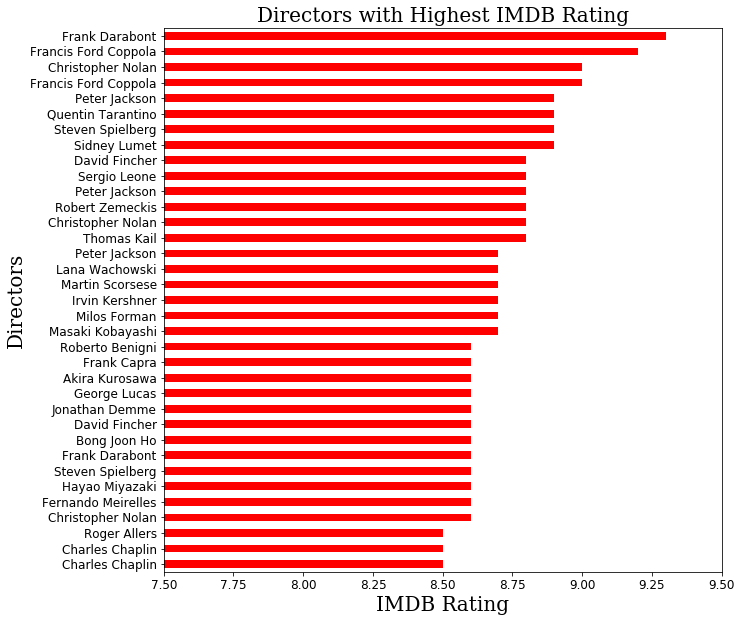

In [28]:
#importing ploting package and 'inline' to preview graph within our code
import matplotlib.pyplot as plt
%matplotlib inline

#converted IMDB_Rating type to a float, originally an object 
df['IMDB_Rating'] = df['IMDB_Rating'].astype('float')

#created a variable, set index to director and sorted values
top_35 = df.set_index('Director').sort_values("IMDB_Rating", ascending=True).tail(35)

plt.figure(figsize=(10,10))
chart = top_35['IMDB_Rating'].plot(kind='barh', colormap ='autumn')
font_dict = {'family': 'serif', 'size':20}
plt.xlabel('IMDB Rating', fontdict=font_dict)
plt.ylabel('Directors', fontdict=font_dict)
plt.tick_params(axis='both', labelsize=12)
plt.title('Directors with Highest IMDB Rating', fontdict=font_dict)
plt.xlim(7.5,9.5)
plt.show()

**Proposal**

Hire either Frank Darabont, Christopher Nolan, Steven Spielberg or Francis Ford Coppola as your director!

**1. Quantity of each type of certification**

Created a table and a graph

**2. Movie Certification vs IMDB Ratings**

Created a table and a graph

In [29]:
import seaborn as sns
rating_count = df.groupby('Movie_Rating').count()
rating_count

/Users/Hiten.K.Patel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Title,Year_Released,Genres,IMDB_Rating,Director,Domestic_Gross(millions)
Movie_Rating,,,,,,
Approved,11,11,11,11,11,11
G,13,13,13,13,13,13
GP,1,1,1,1,1,1
Not Rated,34,34,34,34,34,34
PG,35,35,35,35,35,35
PG-13,30,30,30,30,30,30
Passed,15,15,15,15,15,15
R,108,108,108,108,108,108
TV-MA,1,1,1,1,1,1


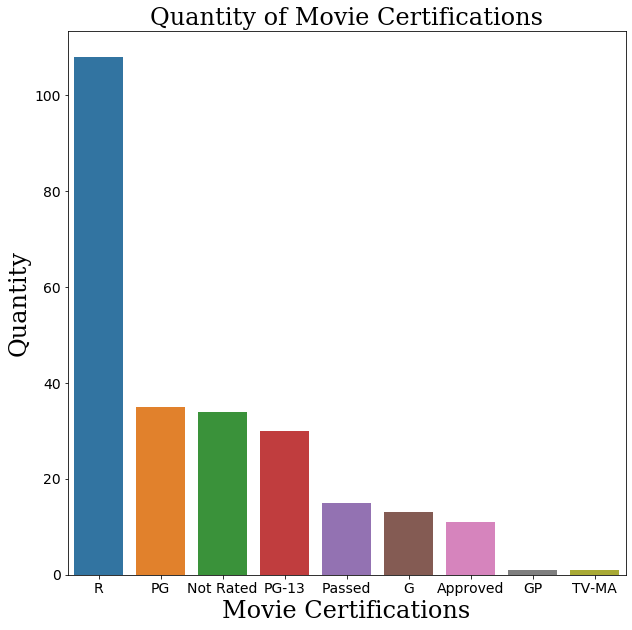

In [30]:
in_order = ['R', 'PG', 'Not Rated', 'PG-13', 'Passed', 'G', 'Approved', 'GP', 'TV-MA']
plt.figure(figsize=(10, 10))
sns.countplot(x='Movie_Rating', order= in_order, data=df)

font_dict = {'family': 'serif', 'size':24}
plt.xlabel('Movie Certifications', fontdict=font_dict)
plt.ylabel('Quantity', fontdict=font_dict)
plt.title('Quantity of Movie Certifications', fontdict=font_dict)
plt.tick_params(axis='both', labelsize=14)

In [31]:
df.dtypes
rating_mean = df.groupby('Movie_Rating').describe()
rating_mean

IMDB_Rating                                                
                   count      mean       std  min    25%  50%   75%  max
Movie_Rating                                                            
Approved            11.0  8.281818  0.235874  8.1  8.100  8.2  8.35  8.9
G                   13.0  8.276923  0.169085  8.0  8.100  8.3  8.40  8.5
GP                   1.0  8.100000       NaN  8.1  8.100  8.1  8.10  8.1
Not Rated           34.0  8.244118  0.152139  8.1  8.100  8.2  8.30  8.7
PG                  35.0  8.285714  0.180103  8.1  8.100  8.3  8.40  8.7
PG-13               30.0  8.406667  0.283978  8.1  8.125  8.4  8.60  9.0
Passed              15.0  8.213333  0.106010  8.1  8.100  8.2  8.30  8.4
R                  108.0  8.325000  0.247653  8.0  8.100  8.3  8.50  9.3
TV-MA                1.0  8.300000       NaN  8.3  8.300  8.3  8.30  8.3

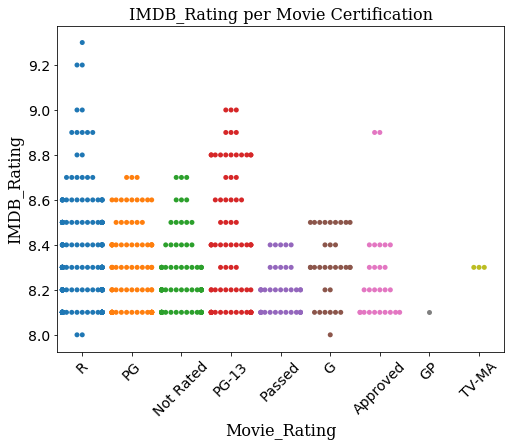

In [59]:
in_order = ['R', 'PG', 'Not Rated', 'PG-13', 'Passed', 'G', 'Approved', 'GP', 'TV-MA']
plt.figure(figsize=(8, 6))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Movie Certifications', fontdict=font_dict)
plt.ylabel('IMDB_Rating', fontdict=font_dict)
plt.title('IMDB_Rating per Movie Certification', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.swarmplot(data=df, x = 'Movie_Rating', y= "IMDB_Rating", order = in_order)

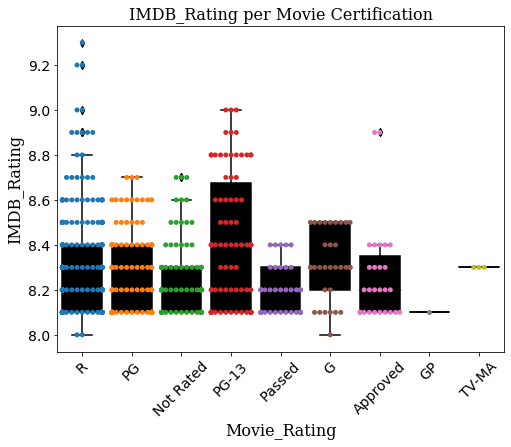

In [58]:
in_order = ['R', 'PG', 'Not Rated', 'PG-13', 'Passed', 'G', 'Approved', 'GP', 'TV-MA']
plt.figure(figsize=(8, 6))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Movie Certifications', fontdict=font_dict)
plt.ylabel('IMDB_Rating', fontdict=font_dict)
plt.title('IMDB_Rating per Movie Certification', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.swarmplot(data=df, x = 'Movie_Rating', y= "IMDB_Rating", order = in_order)
sns.boxplot(data=df, x = 'Movie_Rating', y= "IMDB_Rating", order = in_order, color="black")

**Proposal**

The film needs to be classified as a Rated-R or a PG-13 Movie Certificate

**Explode movies that have multiple genres**

**Removed rows that does not have a value for Domestic_Gross**

In [33]:
#created a new column, List of Genres from Genres. Cleaned up Genres and explode

df['List_of_Genres'] = df['Genres'].map(lambda x: x.strip().split(','))
df = df.explode('List_of_Genres')

df['List_of_Genres']=df['List_of_Genres'].map(lambda x: x.strip())
display (df.head())

genre_count = df.groupby("List_of_Genres")['Title'].count()
display(genre_count)

,Title,Year_Released,Genres,Movie_Rating,IMDB_Rating,Director,Domestic_Gross(millions),List_of_Genres
0,The Shawshank Redemption,1994,Drama,R,9.3,Frank Darabont,$28.34M,Drama
1,The Godfather,1972,"Crime, Drama",R,9.2,Francis Ford Coppola,$134.97M,Crime
1,The Godfather,1972,"Crime, Drama",R,9.2,Francis Ford Coppola,$134.97M,Drama
2,The Dark Knight,2008,"Action, Crime, Drama",PG-13,9.0,Christopher Nolan,$534.86M,Action
2,The Dark Knight,2008,"Action, Crime, Drama",PG-13,9.0,Christopher Nolan,$534.86M,Crime


List_of_Genres
Action        43
Adventure     56
Animation     20
Biography     26
Comedy        43
Crime         53
Drama        181
Family        13
Fantasy       14
Film-Noir      3
History       15
Horror         4
Music          3
Musical        4
Mystery       30
Romance       23
Sci-Fi        22
Sport          6
Thriller      37
War           19
Western        6
Name: Title, dtype: int64

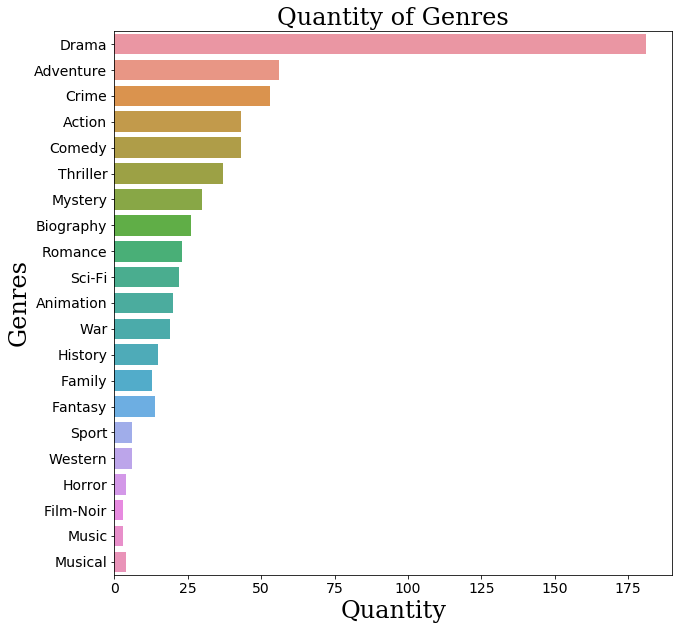

In [34]:
i_order = ['Drama', 'Adventure', 'Crime', 'Action', 'Comedy', 'Thriller', 'Mystery', 'Biography', 'Romance', 'Sci-Fi', 'Animation', 'War', 'History', 'Family', 
            'Fantasy', 'Sport', 'Western', 'Horror', 'Film-Noir', 'Music', 'Musical']
plt.figure(figsize=(10, 10))

sns.countplot(y='List_of_Genres', order=i_order, data=df)
font_dict = {'family': 'serif', 'size':24}
plt.xlabel('Quantity', fontdict=font_dict)
plt.ylabel('Genres', fontdict=font_dict)
plt.title('Quantity of Genres', fontdict=font_dict)
plt.tick_params(axis='both', labelsize=14)



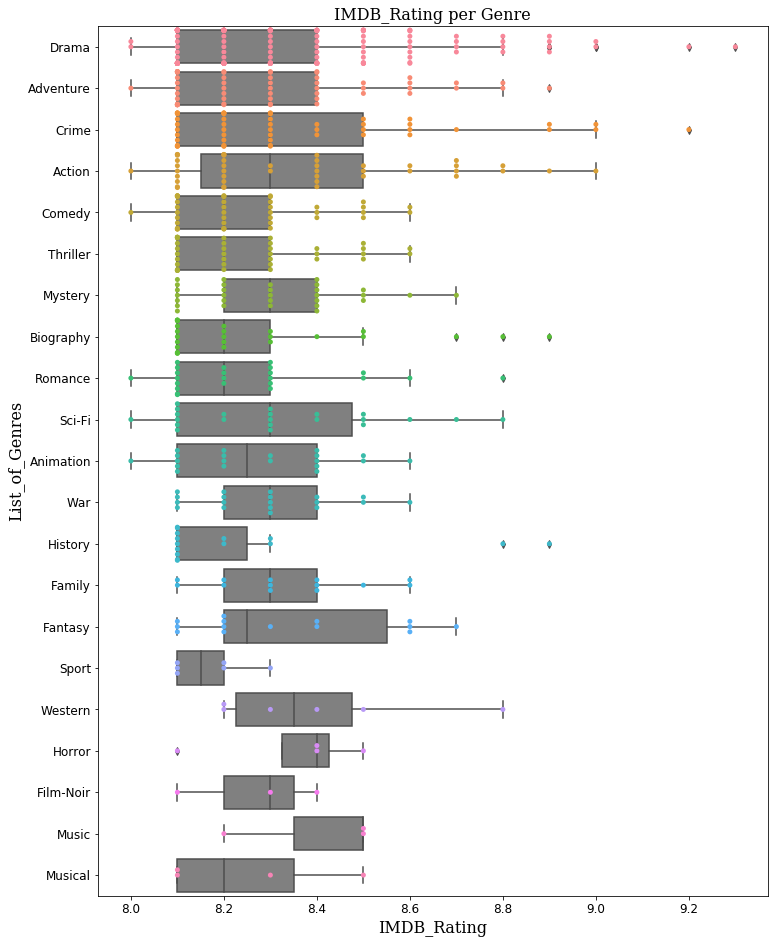

In [55]:
i_order = ['Drama', 'Adventure', 'Crime', 'Action', 'Comedy', 'Thriller', 'Mystery', 'Biography', 'Romance', 'Sci-Fi', 'Animation', 'War', 'History', 'Family', 
            'Fantasy', 'Sport', 'Western', 'Horror', 'Film-Noir', 'Music', 'Musical']
plt.figure(figsize=(12, 16))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('List_of_Genres', fontdict=font_dict)
plt.ylabel('IMDB_Rating', fontdict=font_dict)
plt.title('IMDB_Rating per Genre', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

sns.swarmplot(data=df, y = 'List_of_Genres', x= "IMDB_Rating", order=i_order)
sns.boxplot(data=df, y = 'List_of_Genres', x= "IMDB_Rating", order=i_order, color= "grey")

**Proposal**

According to the graphs and data, the film needs to fall into the Genre, "Drama". The film genre can be combined with Adventure, Crime, or Action. 

**Conclusion**

After digging deep into IMDB's Top 250 Movies database, we have concluded the folloiwng; 

1. Hire the best director; Frank Darabont, Christopher Nolan, Steven Spielberg or Frank Ford Coppola. 

2. The film needs to be classified as a Rated-R or a PG-13 film

3. The film genre needs to fall under the "Drama" category and it can be combined with 'Adventure', 'Crime', or 'Action'. 